In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

###### Read the data from csv file

In [2]:
del_time = pd.read_csv("delivery_time.csv")
del_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [4]:
del_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: >

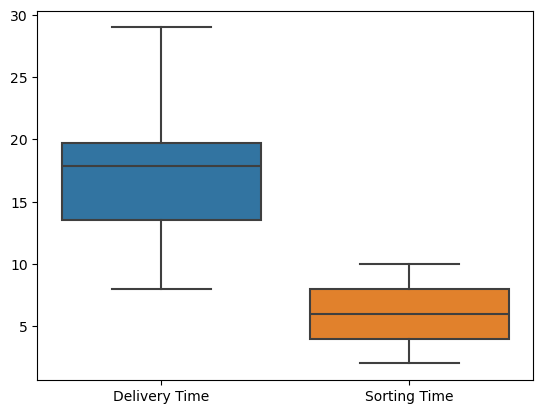

In [5]:
sns.boxplot(del_time)

<Axes: xlabel='Delivery Time', ylabel='Count'>

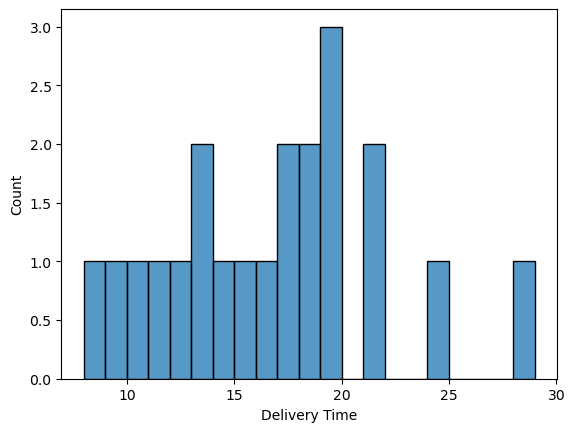

In [6]:
sns.histplot(del_time["Delivery Time"]
            , bins = 21)

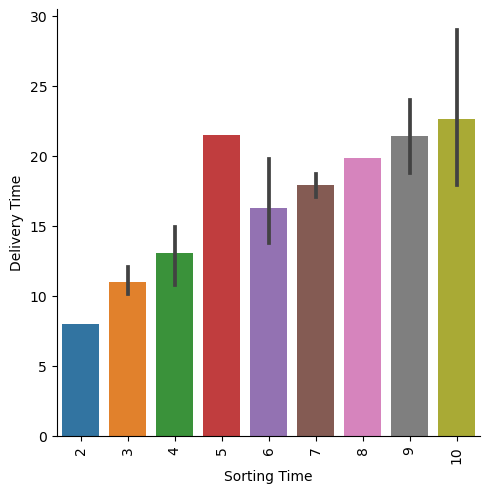

In [7]:
sns.catplot(x="Sorting Time", 
            y='Delivery Time',
            data=del_time,
            kind="bar",
           )
plt.xticks(rotation=90)
# Show plot
plt.show()

## Corelation 

In [8]:
del_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


##### No outlier present in the data 

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

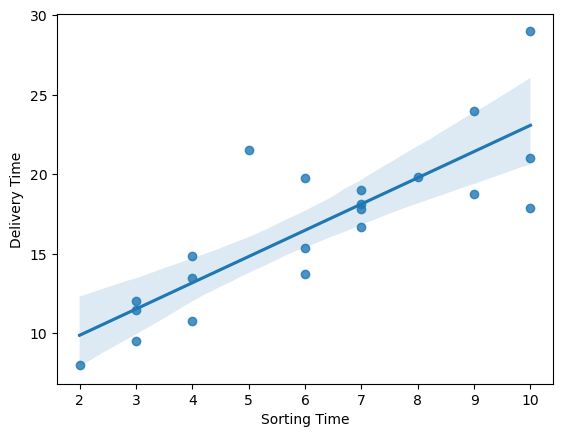

In [9]:
x = del_time["Sorting Time"]
y = del_time["Delivery Time"]
#plt.scatter(x,y)
#plt.xlabel("Sorting Time")
#plt.ylabel("Deliever Time")
sns.regplot(x=del_time['Sorting Time'],y=del_time['Delivery Time'])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.33, random_state = 42)

In [11]:
x_train

3      9
18     2
16     6
13     3
2      6
9      9
20     5
4     10
12     7
7      3
10     8
14     3
19     7
6      7
Name: Sorting Time, dtype: int64

In [12]:
x_train.shape,x_test.shape

((14,), (7,))

In [13]:
y_train.shape,y_test.shape

((14,), (7,))

In [14]:
## Convert into numpy array, reshape it into 2D Array wit single column for transforming column vector.
x_train = np.array(x_train).reshape(-1,1)
x_train

array([[ 9],
       [ 2],
       [ 6],
       [ 3],
       [ 6],
       [ 9],
       [ 5],
       [10],
       [ 7],
       [ 3],
       [ 8],
       [ 3],
       [ 7],
       [ 7]], dtype=int64)

In [15]:
x_test = np.array(x_test).reshape(-1,1)
x_test

array([[10],
       [ 7],
       [ 4],
       [ 4],
       [10],
       [ 6],
       [ 4]], dtype=int64)

# Model Building

In [16]:
model = LinearRegression()

In [17]:
model.fit(x_train, y_train)   # y = mx + C (For training)

LinearRegression()

### Model Parameter

In [18]:
c = model.intercept_
c                            ## Intercept 

5.240849453322129

In [19]:
m = model.coef_
m                           ## Slope = coofficient

array([1.97350715])

### Prediction of training data

In [20]:
y_pred_train = model.predict(x_train)
y_pred_train

array([23.00241379,  9.18786375, 17.08189235, 11.1613709 , 17.08189235,
       23.00241379, 15.1083852 , 24.97592094, 19.0553995 , 11.1613709 ,
       21.02890664, 11.1613709 , 19.0553995 , 19.0553995 ])

Text(0, 0.5, 'Delievery time')

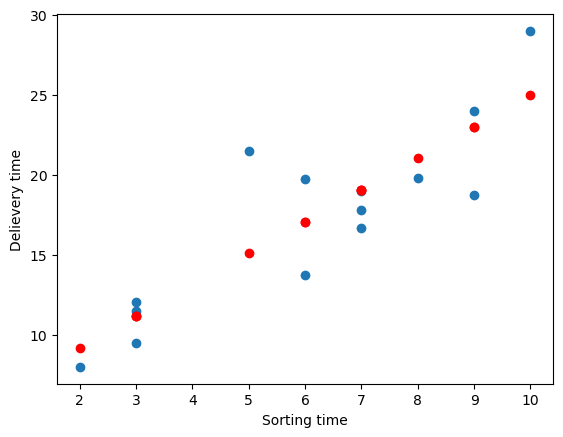

In [21]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_pred_train, color = 'red')
plt.xlabel("Sorting time")
plt.ylabel("Delievery time")

Text(0, 0.5, 'Delievery time')

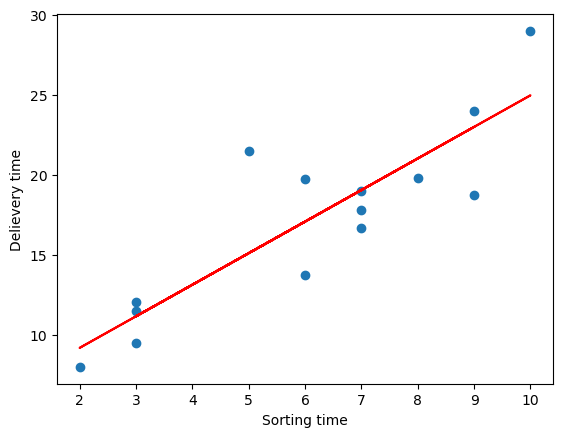

In [22]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train, color = 'red')
plt.xlabel("Sorting time")
plt.ylabel("Delievery time")

In [23]:
training_error = y_train - y_pred_train
training_error

3     0.997586
18   -1.187864
16   -3.331892
13    0.338629
2     2.668108
9    -4.252414
20    6.391615
4     4.024079
12   -2.375399
7    -1.661371
10   -1.198907
14    0.868629
19   -1.225399
6    -0.055399
Name: Delivery Time, dtype: float64

In [24]:
train_mse = np.mean(training_error**2)

In [25]:
train_rmse = np.sqrt(train_mse)

In [26]:
train_mse,train_rmse

(7.712099363210383, 2.7770666832487807)

In [27]:
r_squared_train = r2_score(y_train, y_pred_train)
r_squared_train

0.7539121518197861

### Prediction of testing data

In [28]:
y_pred_test = model.predict(x_test)
y_pred_test

array([24.97592094, 19.0553995 , 13.13487805, 13.13487805, 24.97592094,
       17.08189235, 13.13487805])

In [29]:
testing_error = y_test - y_pred_test
testing_error

0    -3.975921
17   -0.945399
15    1.745122
1     0.365122
8    -7.075921
5    -1.731892
11   -2.384878
Name: Delivery Time, dtype: float64

In [30]:
test_mse = np.mean(testing_error**2)

In [31]:
test_rmse = np.sqrt(test_mse)

In [32]:
test_mse,test_rmse

(11.233749112994298, 3.351678551561038)

In [33]:
r_squared_test = r2_score(y_test, y_pred_test)
r_squared_test                                              

-0.1477340438763617

Text(0, 0.5, 'Delievery time')

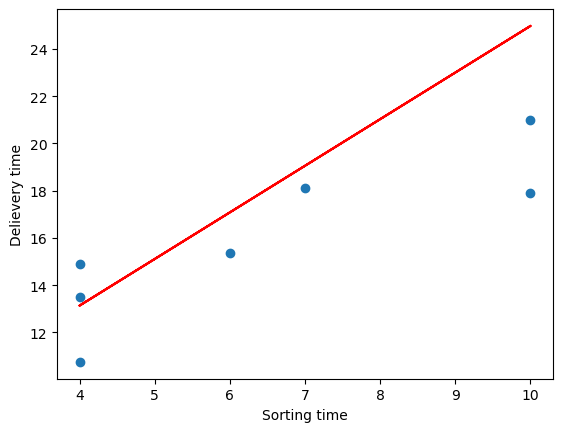

In [34]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test, color = 'red')
plt.xlabel("Sorting time")
plt.ylabel("Delievery time")

### comparision

In [35]:
y_test,y_pred_test

(0     21.00
 17    18.11
 15    14.88
 1     13.50
 8     17.90
 5     15.35
 11    10.75
 Name: Delivery Time, dtype: float64,
 array([24.97592094, 19.0553995 , 13.13487805, 13.13487805, 24.97592094,
        17.08189235, 13.13487805]))

In [36]:
y_train,y_pred_train

(3     24.00
 18     8.00
 16    13.75
 13    11.50
 2     19.75
 9     18.75
 20    21.50
 4     29.00
 12    16.68
 7      9.50
 10    19.83
 14    12.03
 19    17.83
 6     19.00
 Name: Delivery Time, dtype: float64,
 array([23.00241379,  9.18786375, 17.08189235, 11.1613709 , 17.08189235,
        23.00241379, 15.1083852 , 24.97592094, 19.0553995 , 11.1613709 ,
        21.02890664, 11.1613709 , 19.0553995 , 19.0553995 ]))

### Prediction


In [37]:
#Predict Delivery Time for Sorting Time = 5, 10
newdata = pd.Series([5,10,2,7])
data_pred = pd.DataFrame(newdata, columns = ['Sorting Time'])
data_pred

,Sorting Time
0,5
1,10
2,2
3,7


In [38]:
model.predict(data_pred)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([15.1083852 , 24.97592094,  9.18786375, 19.0553995 ])

# Transformation 

In [73]:
del_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [75]:
X = del_time[['Sorting Time']]
y = del_time['Delivery Time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformations
transformations = {
    'original': lambda x: x,
    'log': np.log,
    'square': np.square,
    'sqrt': np.sqrt
}



In [78]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Perform linear regression with different transformations
for name, transform in transformations.items():
    y_train_transformed = transform(y_train)
    y_test_transformed = transform(y_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train_transformed)
    
    y_pred_transformed = model.predict(X_test)
    
    rmse = sqrt(mean_squared_error(y_test_transformed, y_pred_transformed))
    print(f'RMSE for {name} transformation: {rmse}')

RMSE for original transformation: 3.7478979383962705
RMSE for log transformation: 0.22888027998185462
RMSE for square transformation: 141.31025085538624
RMSE for sqrt transformation: 0.45408372621041837


# Salary Hike

In [40]:
sal_hike = pd.read_csv("Salary_Data.csv")
sal_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [41]:
sal_hike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [42]:
sal_hike.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [43]:
sal_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Transformation 

In [80]:
X = sal_hike[['YearsExperience']]
y = sal_hike['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformations
transformations = {
    'original': lambda x: x,
    'log': np.log,
    'square': np.square,
    'sqrt': np.sqrt
}


In [81]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# Perform linear regression with different transformations
for name, transform in transformations.items():
    y_train_transformed = transform(y_train)
    y_test_transformed = transform(y_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train_transformed)
    
    y_pred_transformed = model.predict(X_test)
    
    rmse = sqrt(mean_squared_error(y_test_transformed, y_pred_transformed))
    print(f'RMSE for {name} transformation: {rmse}')

RMSE for original transformation: 7059.04362190151
RMSE for log transformation: 0.11588820167551828
RMSE for square transformation: 1134286891.6637993
RMSE for sqrt transformation: 13.865851776555699


<Axes: xlabel='YearsExperience', ylabel='Salary'>

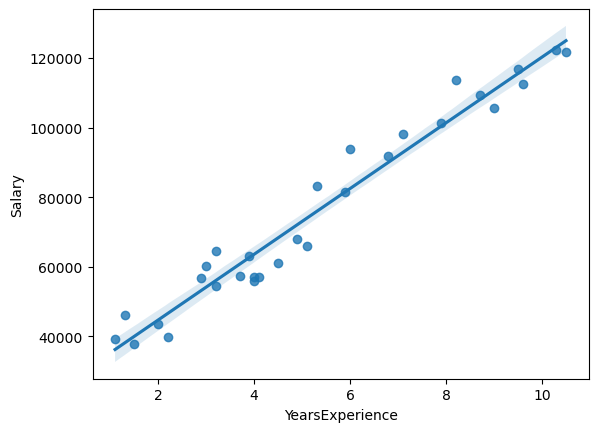

In [44]:
sns.regplot(x=sal_hike['YearsExperience'],y=sal_hike['Salary'])

In [45]:
x1 = sal_hike["YearsExperience"]
y1 = sal_hike["Salary"]

In [46]:
x_train_, x_test_, y_train_, y_test_ = train_test_split(x1,y1,test_size= 0.33, random_state = 42)

In [47]:
x_train_.shape, x_test_.shape

((20,), (10,))

In [48]:
y_train_.shape,y_test_.shape

((20,), (10,))

# Model Building

In [49]:
L_model = LinearRegression()
L_model

LinearRegression()

In [50]:
x_train_ = np.array(x_train_).reshape(-1,1)
x_train_

array([[ 2.2],
       [ 5.1],
       [ 2.9],
       [ 4.1],
       [ 4. ],
       [ 7.9],
       [ 1.3],
       [ 1.5],
       [ 9. ],
       [ 2. ],
       [ 7.1],
       [ 9.5],
       [ 5.9],
       [10.5],
       [ 6.8],
       [ 3.2],
       [ 3.9],
       [ 4.5],
       [ 6. ],
       [ 3. ]])

In [51]:
x_test_ = np.array(x_test_).reshape(-1,1)
x_test_

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7],
       [ 4. ],
       [ 1.1]])

In [52]:
L_model.fit(x_train_ , y_train_)

LinearRegression()

In [53]:
cof = L_model.intercept_
cof                          # C value

25324.33537924433

In [54]:
m_ = L_model.coef_
m_          # M value

array([9426.03876907])

### Prediction of training data

In [55]:
y_train_predict_ = L_model.predict(x_train_)
y_train_predict_

array([ 46061.62067121,  73397.13310153,  52659.84780956,  63971.09433245,
        63028.49045554,  99790.04165494,  37578.18577904,  39463.39353286,
       110158.68430092,  44176.41291739,  92249.21063968, 114871.70368546,
        80937.96411679, 124297.74245453,  89421.39900895,  55487.65944028,
        62085.88657864,  67741.50984008,  81880.56799369,  53602.45168647])

In [56]:
training_error_ = y_train_ - y_train_predict_
training_error_

4     -6170.620671
16    -7368.133102
5      3982.152190
13    -6890.094332
11    -7234.490456
22     1511.958345
1      8626.814221
2     -1732.393533
25    -4576.684301
3      -651.412917
21     6023.789360
26     2097.296315
18      425.035883
29    -2425.742455
20     2316.600991
7     -1042.659440
10     1132.113421
14    -6630.509840
19    12059.432006
6      6547.548314
Name: Salary, dtype: float64

In [57]:
train_mse_ = np.mean(training_error_**2)

In [58]:
train_rmse_ = np.sqrt(train_mse_)

In [59]:
train_mse_ , train_rmse_

(29793161.082422983, 5458.31119325593)

In [60]:
r_scor_train = r2_score(y_train_,y_train_predict_)
r_scor_train

0.9549236946181227

### Prediction of Testing data

In [61]:
y_test_predict_ = L_model.predict(x_test_)
y_test_predict_

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

In [62]:
testing_error_ = y_test_ - y_test_predict_
testing_error_

27    -3179.307562
15    -3573.925348
23    11194.146714
17     7805.659145
8      8957.340560
9     -3011.678825
28      -21.534701
24     2100.127330
12    -6071.490456
0      3650.021975
Name: Salary, dtype: float64

In [63]:
test_mse_ = np.mean(testing_error_**2)

In [64]:
train_rmse_ = np.sqrt(test_mse_)

In [65]:
test_mse_ , train_rmse_

(35301898.887134895, 5941.540110706558)

In [66]:
r_scor_test = r2_score(y_test_,y_test_predict_)
r_scor_test

0.9553063138044949

### Training Visulization

Text(0, 0.5, 'salary')

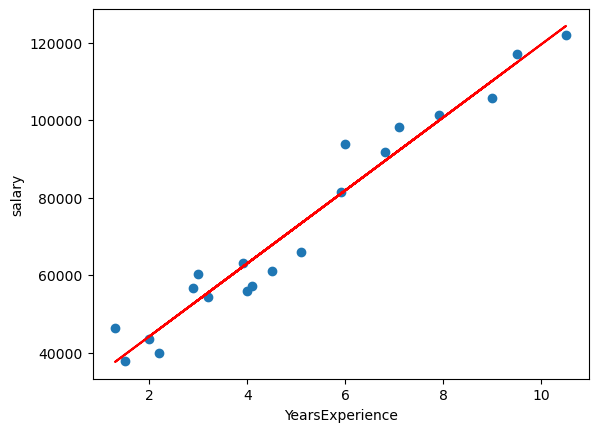

In [67]:
plt.scatter(x_train_,y_train_)
plt.plot(x_train_,y_train_predict_, color = 'red')
plt.xlabel("YearsExperience")
plt.ylabel("salary")

### Testing Visulization

Text(0, 0.5, 'salary')

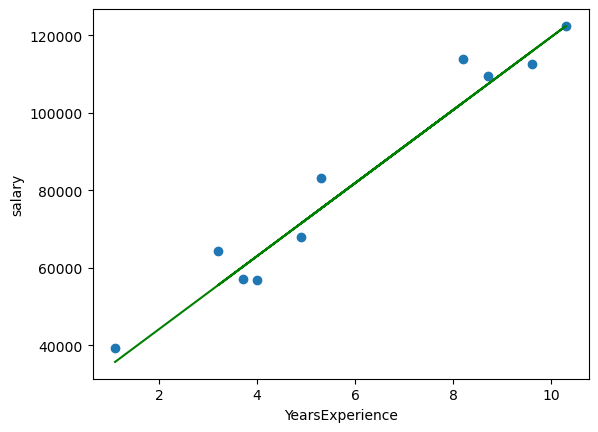

In [68]:
plt.scatter(x_test_,y_test_)
plt.plot(x_test_,y_test_predict_, color = 'green')
plt.xlabel("YearsExperience")
plt.ylabel("salary")

# Prediction for salary through YearsExperience

In [69]:
YofExp = pd.Series([1,1.4, 2,2.7,3,5,7,8.9,9.5,15,20])
new_data_pred_ = pd.DataFrame(YofExp, columns = ['YofExp'])

In [70]:
new_data_pred_

,YofExp
0,1.0
1,1.4
2,2.0
3,2.7
4,3.0
5,5.0
6,7.0
7,8.9
8,9.5
9,15.0


In [71]:
L_model.predict(new_data_pred_)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 34750.37414832,  38520.78965595,  44176.41291739,  50774.64005575,
        53602.45168647,  72454.52922462,  91306.60676277, 109216.08042401,
       114871.70368546, 166714.91691537, 213845.11076074])